# Introduction to Neural Networks

## Import packages

In [5]:
pip install tensorflow

     |████████████████████████████████| 165.1 MB 19 kB/s  eta 0:00:01   |█                               | 5.2 MB 4.0 MB/s eta 0:00:41     |██▉                             | 14.8 MB 8.3 MB/s eta 0:00:19     |███████                         | 36.3 MB 6.7 MB/s eta 0:00:20     |███████████▎                    | 58.3 MB 2.7 MB/s eta 0:00:41     |█████████████████████████████▍  | 151.7 MB 5.9 MB/s eta 0:00:03
     |████████████████████████████████| 42 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 3.1 MB/s eta 0:00:01    |███████████████                 | 5.0 MB 2.0 MB/s eta 0:00:03
     |████████████████████████████████| 127 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 3.1 M

In [2]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [28]:
X_train[0].shape

(28, 28)

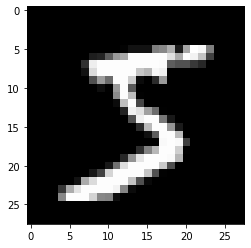

In [29]:
plt.imshow(X_train[0],cmap='gray')

In [30]:
y_train[0]

5

## Preprocessing the image data

In [31]:
image_height,image_width = 28,28

In [32]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [33]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [34]:
X_train /=255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [35]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [36]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [38]:
model = Sequential()

In [39]:
model.add(Dense(512,activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [43]:
784*512+512

401920

In [44]:
512*512+512

262656

In [45]:
512*10+10

5130

## Train the model

In [47]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1837 - accuracy: 0.9443 - val_loss: 0.0935 - val_accuracy: 0.9701
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0827 - accuracy: 0.9749 - val_loss: 0.0796 - val_accuracy: 0.9756
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0555 - accuracy: 0.9825 - val_loss: 0.0803 - val_accuracy: 0.9779
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0417 - accuracy: 0.9865 - val_loss: 0.0925 - val_accuracy: 0.9746
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0834 - val_accuracy: 0.9788
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0884 - val_accuracy: 0.9781
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0731 - val_ac

## What is the accuracy of the model?

### Plot the accuracy of the training model

In [48]:
plt.plot(history.history['acc'])

KeyError: 'acc'

### Plot the accuracy of training and validation set

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Accuracy of training and validation with loss

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

In [50]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1340 - accuracy: 0.9821


In [51]:
score

[0.13398340344429016, 0.9821000099182129]

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Pre-processing

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()